In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels import robust

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None)
#data = pd.read_csv("AdultCensusInfo.csv")
data.columns = ["Age", "Workclass", "FinlWeight", "Education", "EducationNum", "MaritalStatus", "Occupation",
                "Relationship", "Race", "Sex", "CapitolGain", "CapitolLoss", "HoursPerWeek", "NativeCountry", "Income"]

In [3]:
data.head()

,Age,Workclass,FinlWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitolGain,CapitolLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# data.to_csv("AdultCensusInfo.csv", index = False)

In [5]:
#  What do missing values look like?
data.Occupation.value_counts()
#  They are '?', lets go an remove those

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [6]:
# Looks like the data has blank spaces around the question marks, we will need to apply strip
data.loc[data.Workclass.str.strip() == "?",]

,Age,Workclass,FinlWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitolGain,CapitolLoss,HoursPerWeek,NativeCountry,Income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
128,35,?,129305,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
149,43,?,174662,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,40,United-States,<=50K
154,52,?,252903,HS-grad,9,Divorced,?,Not-in-family,White,Male,0,0,45,United-States,>50K
160,68,?,38317,1st-4th,2,Divorced,?,Not-in-family,White,Female,0,0,20,United-States,<=50K
187,53,?,135105,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,50,United-States,<=50K


In [7]:
stringCols = ["Workclass", "Education", "MaritalStatus", "Occupation", "Relationship", "Race", "Sex", "NativeCountry"]
data[stringCols] = data[stringCols].apply(lambda x : x.str.strip(), axis = 0)
data = data.replace(to_replace="?", value=np.nan)
data.apply(lambda x: x.isnull().sum(), axis=0)

Age                 0
Workclass        1836
FinlWeight          0
Education           0
EducationNum        0
MaritalStatus       0
Occupation       1843
Relationship        0
Race                0
Sex                 0
CapitolGain         0
CapitolLoss         0
HoursPerWeek        0
NativeCountry     583
Income              0
dtype: int64

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

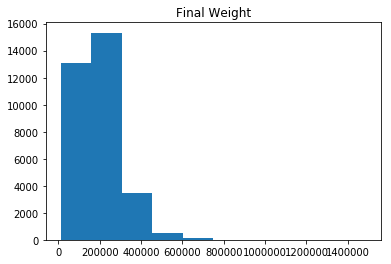

In [8]:
# The numeric columns we have are Age, FinlWeight, EducationNum, Capitol Gain/Loss, and HoursPerWeek
# Lets take a look at FinlWeight as it seems to be arbitrary from CPS data scources
fw = pd.Series(data.FinlWeight)
plt.title("Final Weight")
plt.hist(fw)

(array([2365., 2413., 4777., 4788., 6849., 3905., 2314., 1695., 1397.,
        2058.]),
 array([ 12285.        ,  51144.00802739,  90003.01605477, 128862.02408216,
        167721.03210955, 206580.04013693, 245439.04816432, 284298.05619171,
        323157.06421909, 362016.07224648, 400875.08027387]),
 <a list of 10 Patch objects>)

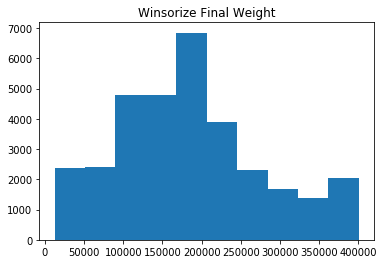

In [9]:
#  Since the tail is so long, I want to minimize the shift of data from the tails, so I am going to winsorize once.
mu_fw = np.mean(fw)
sigma_fw = np.std(fw)
limit = mu_fw + 2*sigma_fw
fw[fw > limit] = limit
plt.title("Winsorize Final Weight")
plt.hist(fw)

In [25]:
#  This actually turned out very nicely, I dont think we want to truncate it again, but lets see
pct_outlier_no_winz = len(data.FinlWeight.loc[data.FinlWeight > mu_fw + 2*sigma_fw])/len(data.FinlWeight)
new_mu = np.mean(fw)
new_sigma = np.std(fw)
pct_outier_wz = len(fw.loc[fw > new_mu + 2*new_sigma])/len(fw)
print("Before winzorization: " + "{0:.3f}%".format(pct_outlier_no_winz * 100))
print("After winzorization: " + "{0:.3f}%".format(pct_outier_wz * 100))
# In theory there are more outliers post winzorization, but I think the shape of the distribution is much more useful.
# Perhaps this is a time we devate from using a normal distribution and look at one that can have fatter tails and a 
# left skew.

Before winzorization: 3.836%
After winzorization: 5.470%


In [11]:
hpw = data.HoursPerWeek
hpw_normalized = (hpw - np.mean(hpw)) / np.std(hpw)
hpw_xscaled = (hpw - min(hpw)) / (max(hpw) - min(hpw))
hpw_mad = stats.norm.ppf(0.75)*(hpw - np.median(hpw)) / robust.mad(hpw)
data["HoursPerWeekNormalized"] = hpw_normalized
data["HoursPerWeekXScaled"] = hpw_xscaled
data["HoursPerWeekMAD"] = hpw_mad

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

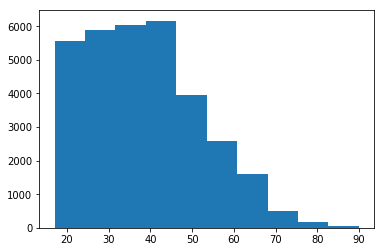

In [12]:
### This is going to be a binnging exercise, I am going to do age
### For the record--I believe you are only as old as you act and feel, dont be offended by my catrgories :)
### Lets start with see how the age distribution looks
plt.hist(data.Age)

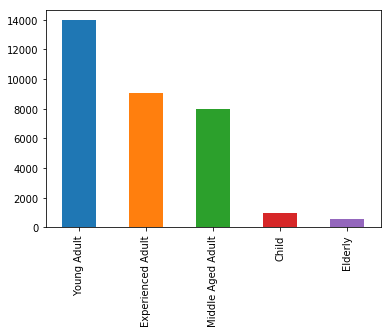

In [19]:
# Mamm.loc[Mamm.loc[:, "Shape"] == "1", "Shape"] = "round"
data["AgeCat"] = pd.Series(np.nan * len(data.Age))
data.Age = data.Age.apply(float)
data.loc[data.loc[:, "Age"] <= 18, "AgeCat"] = "Child"
data.loc[(data.loc[:, "Age"] > 18) & (data.loc[:, "Age"] <= 35), "AgeCat"] = "Young Adult"
data.loc[(data.loc[:, "Age"] > 35) & (data.loc[:, "Age"] <= 45), "AgeCat"] = "Middle Aged Adult"
data.loc[(data.loc[:, "Age"] > 45) & (data.loc[:, "Age"] <= 70), "AgeCat"] = "Experienced Adult"
data.loc[(data.loc[:, "Age"] > 70), "AgeCat"] = "Elderly"
data.AgeCat.value_counts().plot(kind='bar')
#  The way I go about this is suboptimal, I would ideally like to have a more explicit caregorical setup rather than 
# something that only works when executed in a certain order.

In [14]:
#  I am going to one hot encode as an example the sex category as there are only two options in the set
data = data.join(pd.get_dummies(data.Sex))
data = data.drop("Sex", axis = 1)
data.head()

,Age,Workclass,FinlWeight,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,CapitolGain,CapitolLoss,HoursPerWeek,NativeCountry,Income,HoursPerWeekNormalized,HoursPerWeekXScaled,HoursPerWeekMAD,AgeCat,Female,Male
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,-0.035429,0.397959,0.000000,Middle Aged Adult,0,1
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,-2.222153,0.122449,-4.094428,Experienced Adult,0,1
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,-0.035429,0.397959,0.000000,Middle Aged Adult,0,1
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,-0.035429,0.397959,0.000000,Experienced Adult,0,1
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,-0.035429,0.397959,0.000000,Young Adult,1,0


In [15]:
data.Education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64

In [16]:
# For consolodation we are going to look at the education
data["Education"] = data.Education.apply(lambda l: l.strip())
data.loc[data.loc[:, "Education"] == "1st-4th", "Education"] = "Grade-School"
data.loc[data.loc[:, "Education"] == "5th-6th", "Education"] = "Grade-School"
data.loc[data.loc[:, "Education"] == "7th-8th", "Education"] = "Grade-School"
data.loc[data.loc[:, "Education"] == "HS-grad", "Education"] = "High-School"
data.loc[data.loc[:, "Education"] == "9th", "Education"] = "High-School"
data.loc[data.loc[:, "Education"] == "10th", "Education"] = "High-School"
data.loc[data.loc[:, "Education"] == "11th", "Education"] = "High-School"
data.loc[data.loc[:, "Education"] == "12th", "Education"] = "High-School"
data.loc[data.loc[:, "Education"] == "Assoc-voc", "Education"] = "Professional-School"
data.loc[data.loc[:, "Education"] == "Prof-school", "Education"] = "Professional-School"
data.loc[data.loc[:, "Education"] == "Some-college", "Education"] = "University"
data.loc[data.loc[:, "Education"] == "Assoc-acdm", "Education"] = "University"
data.loc[data.loc[:, "Education"] == "Some-college", "Education"] = "University"
data.loc[data.loc[:, "Education"] == "Bachelors", "Education"] = "University"
data.Education.value_counts()

University             13713
High-School            13556
Professional-School     1958
Masters                 1723
Grade-School            1147
Doctorate                413
Preschool                 51
Name: Education, dtype: int64